## Visualization and kNN Homework

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Predicting a numeric outcome is called regression, and predicting a categorical outcome is called classification.
2. A confusion table is a cross-tabulation of predicted and actual values. It helps look for patterns in the successes and failures.
3. Sum of Squared Errors (SSE) quantifies the total squared difference between the predicted and actual values in a regression model.
4. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in, and overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in.
5. Splitting ensures that the model is trained on one subset and evaluated on unseen data, mimicking real-world scenarios. It helps detect overfitting and helps select optimal hyperparameters.
6. Hard classification assigns a single label, making it simple and fast but lacking confidence levels. Soft classification provides probabilities, allowing for confidence-based decisions but adding complexity. Use hard classification for clear-cut decisions and soft classification when uncertainty matters.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
# 1
import pandas as pd
df = pd.read_csv("USA_cars_datasets.csv")

df = df[['price', 'year', 'mileage']]

na_counts = df.isna().sum()

print("First few rows of the dataset:")
display(df.head())

print("\nDataset dimensions:", df.shape)

print("\nMissing values per column:")
print(na_counts)

First few rows of the dataset:


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654



Dataset dimensions: (2499, 3)

Missing values per column:
price      0
year       0
mileage    0
dtype: int64


There are no missing values (NA's) to handle.

In [3]:
# 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])
display(df.head())

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [4]:
# 3
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1999, 3)
Testing set shape: (500, 3)


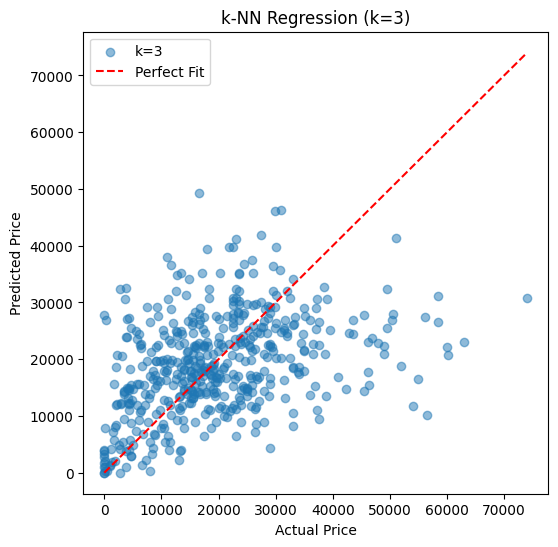

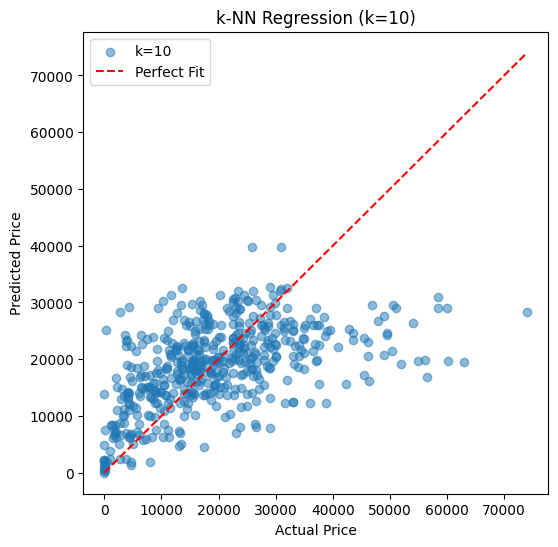

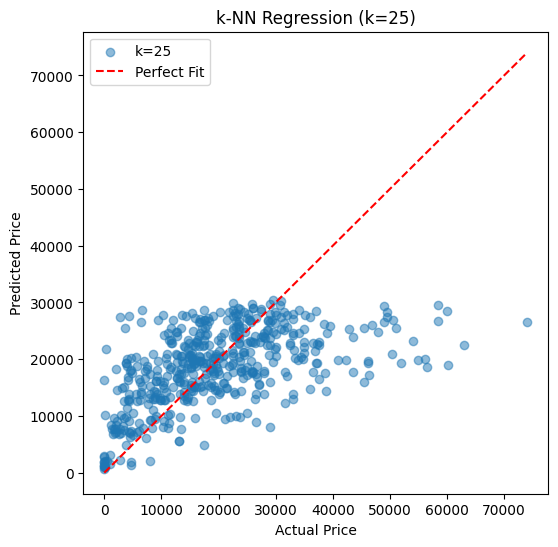

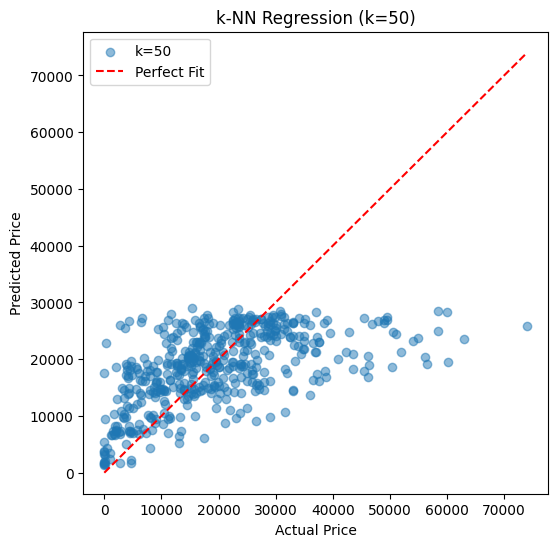

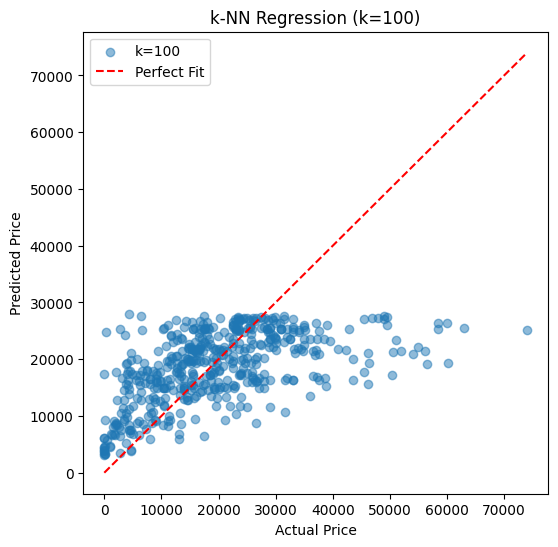

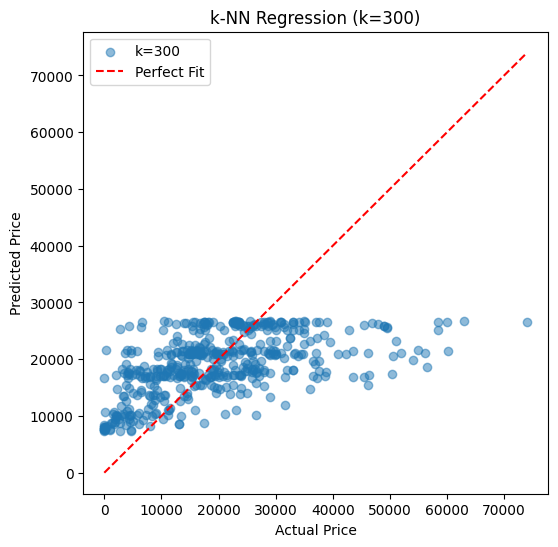

Mean Squared Errors for different k values: {3: 148065935.51955554, 10: 117399126.10604002, 25: 112576160.82390079, 50: 110202549.3014296, 100: 112253702.9700672, 300: 114496092.28682345}


In [5]:
# 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]

X_train, y_train = train_df[['year', 'mileage']], train_df['price']
X_test, y_test = test_df[['year', 'mileage']], test_df['price']

mse_results = {}
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label=f'k={k}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k})")
    plt.legend()
    plt.show()

print("Mean Squared Errors for different k values:", mse_results)

Low k values lead to higher variance (more noise) and higher MSE. Increasing k reduces MSE, improving stability. Very high k values begin to smooth out predictions too much, slightly increasing MSE again.

In [6]:
# 5
optimal_k = min(mse_results, key=mse_results.get)
optimal_k

50

The optimal value of k for this data is 50, as it results in the lowest Mean Squared Error (MSE).

6. As k increased, the scatter plots of predicted versus actual prices changed significantly. With small k values, predictions were highly variable, and many points deviated far from the perfect fit line. This indicated overfitting, where the model captured noise in the training data instead of generalizing well to new data. For moderate k values, predictions became more stable, aligning more closely with the actual values. This balance reduced both bias and variance, leading to improved accuracy. With large k values, predictions became overly smoothed, showing little variation. The model averaged too many neighbors, leading to underfitting, where it failed to capture important patterns in the data. The optimal value, k=50, achieved the best trade-off between overfitting and underfitting, minimizing the Mean Squared Error (MSE) and providing the most reliable predictions.

**Visualization Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)

aid_value - The average amount of student aid going to undergraduate recipients

control - Public, Private not-for-profit, Private for-profit

grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

In [8]:
# 1 and 2
import pandas as pd
df_college = pd.read_csv("college_completion.csv")

print("Dataset dimensions:", df_college.shape)

print("Number of observations:", df_college.shape[0])

print("\nVariables in the dataset:")
print(df_college.columns.tolist())

print("\nFirst few rows of the dataset:")
display(df_college.head())

Dataset dimensions: (3798, 63)
Number of observations: 3798

Variables in the dataset:
['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_af

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [11]:
# 3
import pandas as pd

crosstab_control_level = pd.crosstab(df_college['control'], df_college['level'])

print("Cross-tabulation of Control and Level:")
display(crosstab_control_level)

Cross-tabulation of Control and Level:


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public institutions have a higher proportion of 2-year colleges (926) compared to 4-year colleges (632), indicating a strong presence of public community colleges.
Private not-for-profit institutions are predominantly 4-year colleges (1,180), with very few 2-year institutions (68), suggesting that most nonprofit institutions focus on bachelor's degrees.
Private for-profit institutions are somewhat balanced, with 527 4-year and 465 2-year institutions, indicating that many for-profit colleges offer both associate and bachelor's degree programs.

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


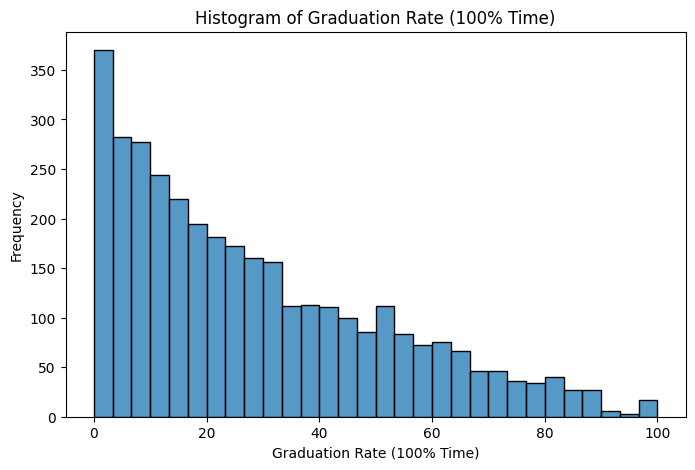

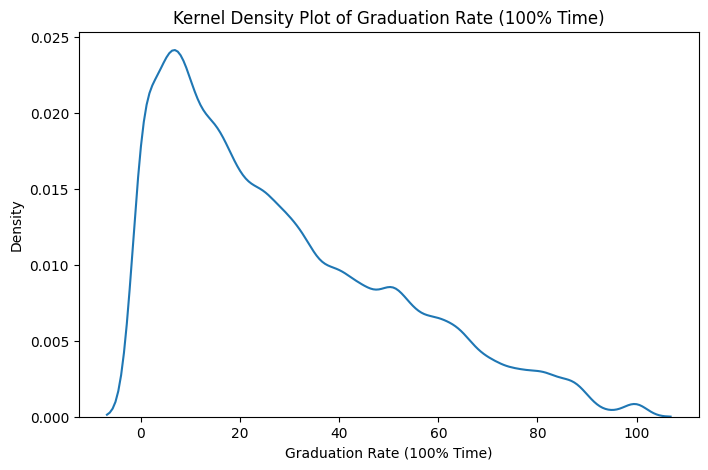

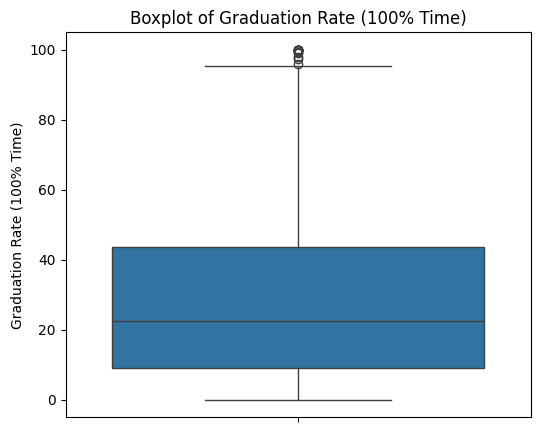

In [12]:
# 4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_college['grad_100_value'] = pd.to_numeric(df_college['grad_100_value'], errors='coerce')
grad_100_clean = df_college['grad_100_value'].dropna()

# statistical description
print("Statistical Description of grad_100_value:")
print(grad_100_clean.describe())

# histogram
plt.figure(figsize=(8, 5))
sns.histplot(grad_100_clean, bins=30, kde=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.ylabel("Frequency")
plt.title("Histogram of Graduation Rate (100% Time)")
plt.show()

# kernel density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(grad_100_clean, bw_adjust=0.5)
plt.xlabel("Graduation Rate (100% Time)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate (100% Time)")
plt.show()

# boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=grad_100_clean)
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Boxplot of Graduation Rate (100% Time)")
plt.show()

Statistical Description by Control:


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8



Statistical Description by Level:


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


<ipython-input-14-a0d07b6538f7>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Control")


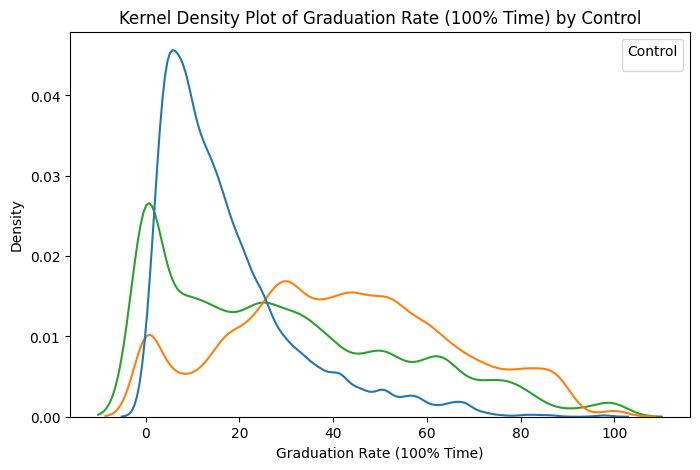

<ipython-input-14-a0d07b6538f7>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Level")


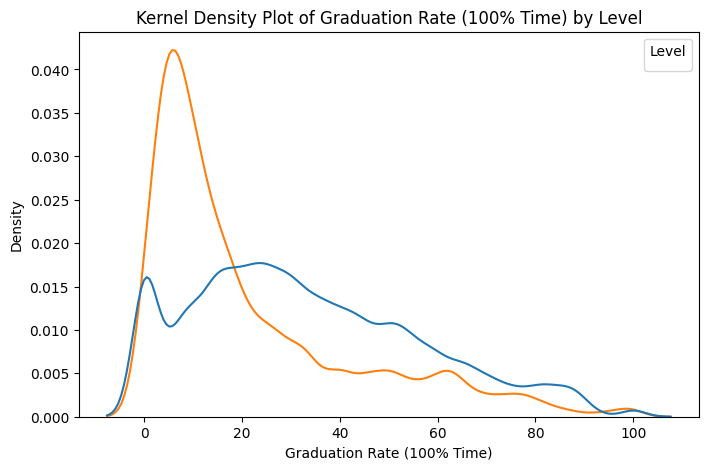

In [14]:
# 5
df_college['grad_100_value'] = pd.to_numeric(df_college['grad_100_value'], errors='coerce')

# Grouped statistical description by 'control'
grad_100_by_control = df_college.groupby('control')['grad_100_value'].describe()
print("Statistical Description by Control:")
display(grad_100_by_control)

# Grouped statistical description by 'level'
grad_100_by_level = df_college.groupby('level')['grad_100_value'].describe()
print("\nStatistical Description by Level:")
display(grad_100_by_level)

# grouped kernel density plot by 'control'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_college, x="grad_100_value", hue="control", bw_adjust=0.5, common_norm=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate (100% Time) by Control")
plt.legend(title="Control")
plt.show()

# grouped kernel density plot by 'level'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_college, x="grad_100_value", hue="level", bw_adjust=0.5, common_norm=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate (100% Time) by Level")
plt.legend(title="Level")
plt.show()


Private not-for-profit, 4-year institutions appear to have the best graduation rates, as their distribution skews toward the higher end. Public institutions show more variation, while for-profit and 2-year institutions generally have lower rates.

<ipython-input-15-3d95a2c69084>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Level, Control", bbox_to_anchor=(1.05, 1), loc='upper left')


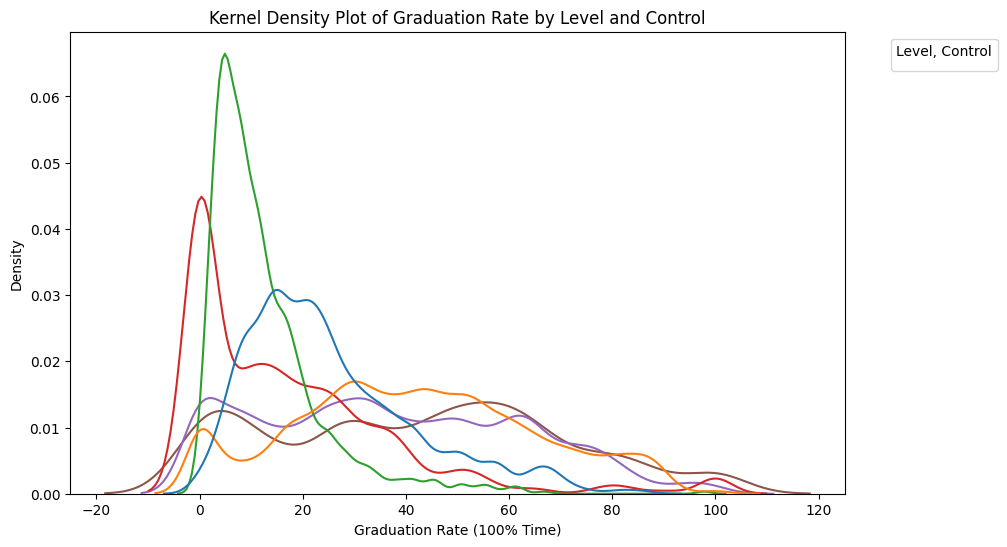

In [15]:
# 6
df_college['grad_100_value'] = pd.to_numeric(df_college['grad_100_value'], errors='coerce')
df_college['levelXcontrol'] = df_college['level'] + ', ' + df_college['control']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_college, x="grad_100_value", hue="levelXcontrol", bw_adjust=0.5, common_norm=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate by Level and Control")
plt.legend(title="Level, Control", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Private not-for-profit 4-year institutions tend to perform best in terms of student graduation within the expected time.

Statistical Description of aid_value by Level:


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0



Statistical Description of aid_value by Control:


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


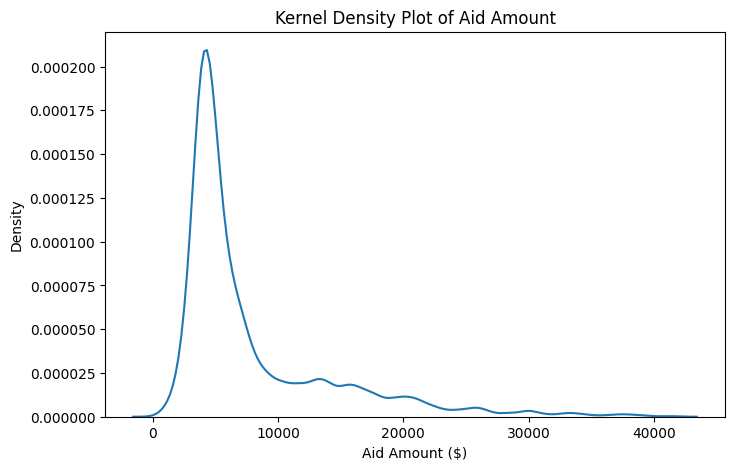

<ipython-input-16-f5e2e3b7b7b1>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Level")


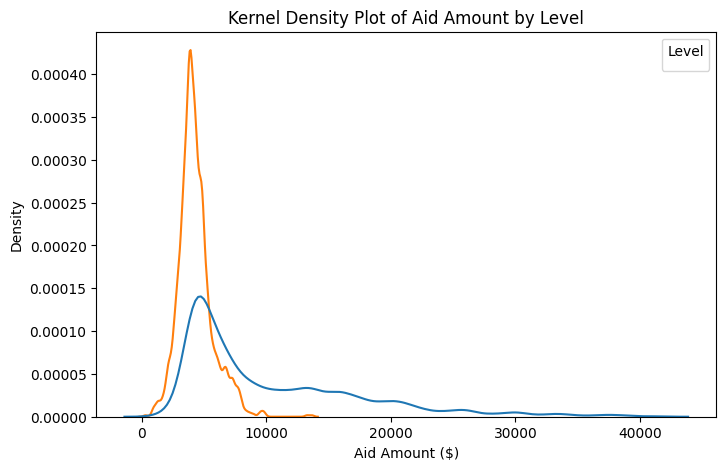

<ipython-input-16-f5e2e3b7b7b1>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Control")


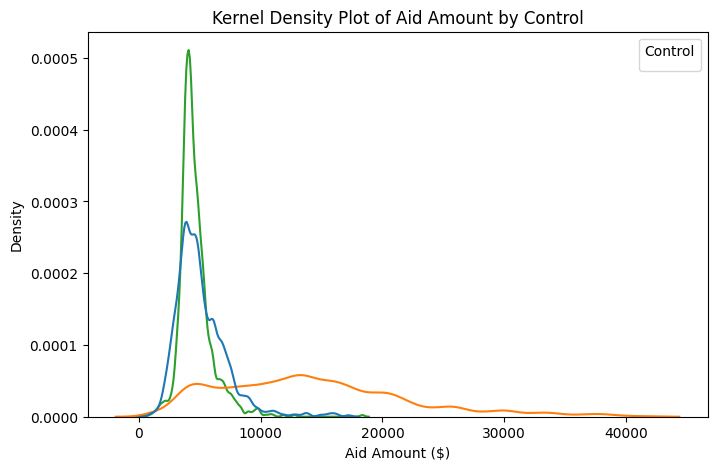

In [16]:
# 7
df_college['aid_value'] = pd.to_numeric(df_college['aid_value'], errors='coerce')

# statistical descriptions grouped by 'level' and 'control'
aid_value_by_level = df_college.groupby('level')['aid_value'].describe()
aid_value_by_control = df_college.groupby('control')['aid_value'].describe()
print("Statistical Description of aid_value by Level:")
display(aid_value_by_level)
print("\nStatistical Description of aid_value by Control:")
display(aid_value_by_control)

# kernel density plot for aid_value
plt.figure(figsize=(8, 5))
sns.kdeplot(df_college['aid_value'].dropna(), bw_adjust=0.5)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Aid Amount")
plt.show()

# grouped kernel density plot by 'level'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_college, x="aid_value", hue="level", bw_adjust=0.5, common_norm=False)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Aid Amount by Level")
plt.legend(title="Level")
plt.show()

# grouped kernel density plot by 'control'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_college, x="aid_value", hue="control", bw_adjust=0.5, common_norm=False)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Aid Amount by Control")
plt.legend(title="Control")
plt.show()

The bimodal shape of the overall aid distribution is explained by: The significant difference in tuition costs between public and private institutions.
2-year vs. 4-year institutions, where aid varies depending on the cost of attendance and available funding sources.

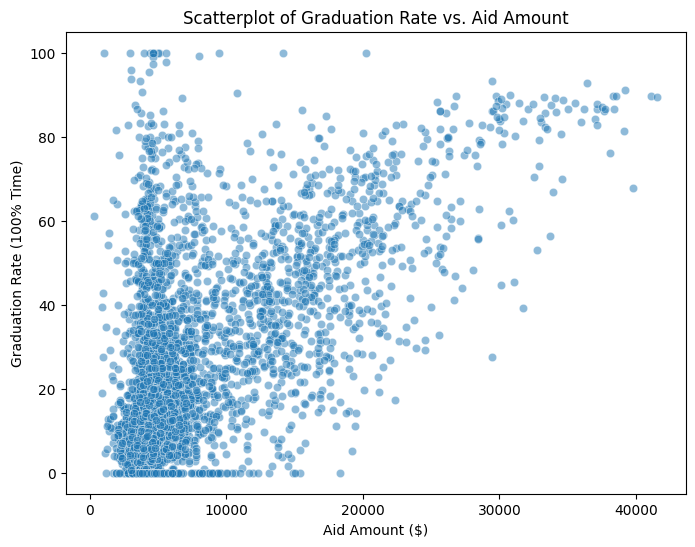

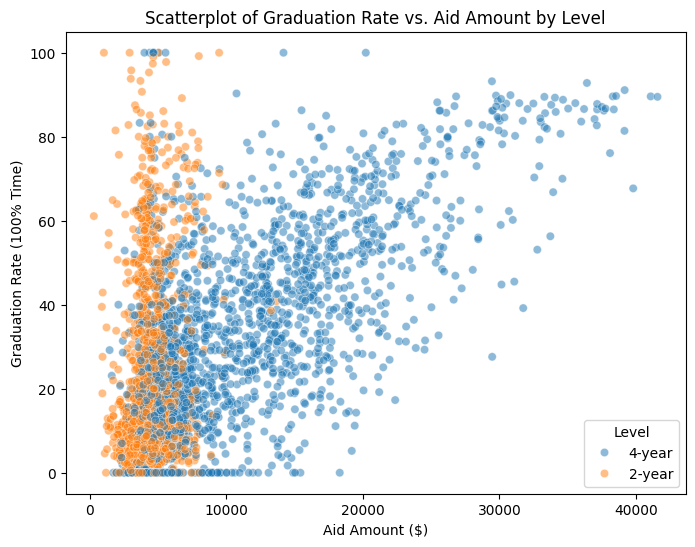

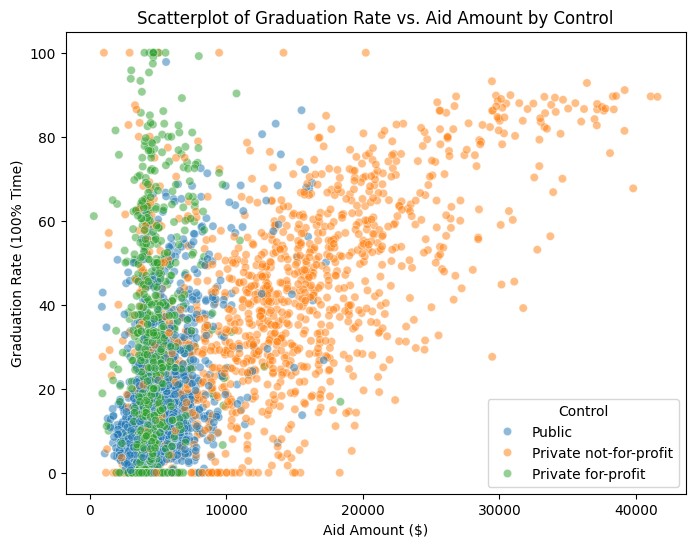

In [17]:
# 8
df_college['grad_100_value'] = pd.to_numeric(df_college['grad_100_value'], errors='coerce')
df_college['aid_value'] = pd.to_numeric(df_college['aid_value'], errors='coerce')

# Scatterplot of Graduation Rate vs. Aid Amount (Overall)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_college, x="aid_value", y="grad_100_value", alpha=0.5)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Scatterplot of Graduation Rate vs. Aid Amount")
plt.show()

# Scatterplot grouped by 'level'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_college, x="aid_value", y="grad_100_value", hue="level", alpha=0.5)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Scatterplot of Graduation Rate vs. Aid Amount by Level")
plt.legend(title="Level")
plt.show()

# Scatterplot grouped by 'control'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_college, x="aid_value", y="grad_100_value", hue="control", alpha=0.5)
plt.xlabel("Aid Amount ($)")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Scatterplot of Graduation Rate vs. Aid Amount by Control")
plt.legend(title="Control")
plt.show()

For overall scatterplot, there is a positive trend, suggesting that higher financial aid is associated with higher graduation rates. In grouped by level, 4-year institutions tend to have both higher aid and higher graduation rates, whereas 2-year institutions cluster at lower aid amounts and lower graduation rates, reflecting lower tuition costs and shorter degree programs. In grouped by control, private not-for-profit institutions generally offer higher aid and have higher graduation rates. Aid seems to increase graduation rates for for students at private and public 4-year institutions.